В этом занятии:

* Научимся разделять данные на тестовую и обучающую выборки

* Будем использовать реализацию метода К-ближайших соседей из библиотеки _sklearn_

* Построим первый _pipeline_ для работы с моделями

* Научимся оптимизировать параметры модели с помощью _GridSearchCV_  и _StandardScaler_

___

In [ ]:
!pip install pandas numpy scipy matplotlib scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Метод К-ближайших соседей

Метод К-ближайших соседей применяется для классификации данных. Далее будем использовать синтетические данные объектов, у которых есть два числовых признака (*X, Y*). Объекты изначально разделены на 3 категории (разметка в столбце *Cluster*)

Импортируем данные

In [2]:
df =  pd.read_csv('./simple_knn.txt')
df.head()

,Object,X,Y,Cluster
0,1,10,17,0
1,2,9,14,2
2,3,18,11,2
3,4,16,12,2
4,5,8,8,2


In [3]:
df

,Object,X,Y,Cluster
0,1,10,17,0
1,2,9,14,2
2,3,18,11,2
3,4,16,12,2
4,5,8,8,2
5,6,15,5,1
6,7,17,11,2
7,8,3,10,0
8,9,2,8,1
9,10,13,3,1


При отображении объектов разных категорий на координатной плоскости, желательно визуально иметь возможность их отличать друг от друга. Для этого категориальный признак можно конвертировать в "цветовой", более интуитивно понятный для визуального представления.

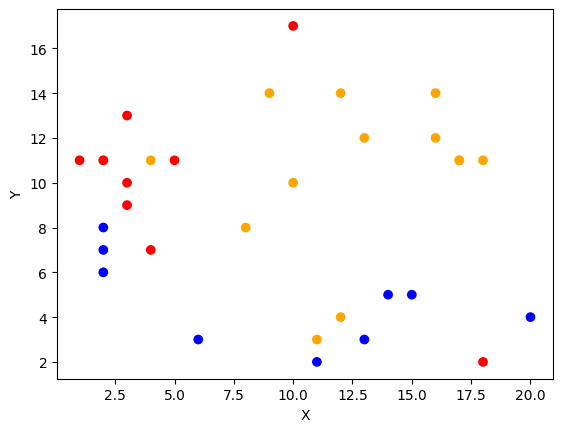

In [5]:
def convert2color(number):
    if number == 0:
        return "red"
    if number == 1:
        return "blue"
    return "orange"

colors =  df['Cluster'].map(convert2color)

plt.scatter(df["X"], df["Y"], color=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Разделение выборки

Разделим исходные данные на признаки (столбцы *X,Y*) и метки категорий ( столбец *Cluster*). Именно метку категории будем предсказывать далее на основе признаков.

In [6]:
data = df[["X", "Y"]]
claster = df["Cluster"]

Существуют разные подходы к обучению и валидации моделей машинного обучения, подробнее о них вы узнате позднее в курсе. Пока будем использовать самый простой подход: разделим признаки и категории на обучающую и тестовую выборки используя метод [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Метод `train_test_split` позволяет разделить исходный датасет на обучающую и тестову выборки. В данном случае используется соотношение 65:35.

Суть подхода в том, что мы на одной части даныных обучаем модель, а на второй оцениваем качество модели.


In [7]:
from sklearn.model_selection import train_test_split

f_train, f_test, c_train, c_test = train_test_split(data, claster,
    test_size=0.35, random_state=12)


Импортируем модель классификации _KNeighborsClassifier_, реализующую метод K-ближайших соседей.

Подробнее о [модели](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



In [9]:
from sklearn.neighbors import KNeighborsClassifier

kmeans = KNeighborsClassifier(
    n_neighbors=5,
    weights= 'distance'
    )

Обучаем модель на тренировочных данных, а затем проверяем, как она будет классифицировать объекты из тестовой выборки

In [10]:
kmeans.fit(f_train, c_train)
y_kmeans = kmeans.predict(f_test)

Построим два рисунка. На первом будут отображены объекты и то, к каким классам они отнесены моделью.

На втором рисунке отобразим цветами то, каким классам на самом деле принадлежат наши объекты.

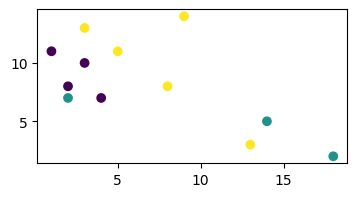

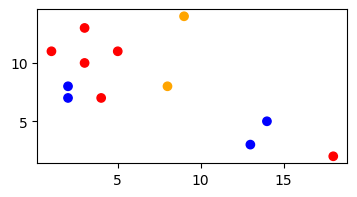

In [11]:
plt.figure(figsize=(4, 2))
plt.scatter(f_test['X'], f_test['Y'], c = y_kmeans)
plt.show()

colors =  c_test.map(convert2color)
plt.figure(figsize=(4, 2))

plt.scatter(f_test["X"], f_test["Y"], color=colors)
plt.show()

Определим качество нашей модели.

Существуют разные способы оценки качества модели, об этом подробнее узнаете в занятии по метрикам.

В данном случае мы будем оценивать качество модели через метрику _accuracy_. Она позволяет показать долю правильных предсказанных классов к общему числу предсказаний, иначе говоря показывает, насколько "точно" модель делает предсказание.

Ее можно импортировать из _sklearn.metrics_. О других метриках подробнее можно почитать [тут](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(c_test, y_kmeans)

0.5833333333333334

При работе с оценкой качества модели бывает полезно смотреть не на одну метрику, а на несколько сразу. Для этого можно воспользоваться функцией `classification_report`.

In [13]:
from sklearn.metrics import classification_report
report = classification_report(c_test, y_kmeans)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.67      0.50      0.57         4
           2       0.40      1.00      0.57         2

    accuracy                           0.58        12
   macro avg       0.61      0.67      0.58        12
weighted avg       0.66      0.58      0.59        12


### **[Задание 1]**

Найдите номера трех ближайших соседей для объекта под номером $7.$ Используйте в качестве расстояния функцию $$ρ(x, y) = \max{|x_i - y_i|},$$ где $x, y –$ точки в конечномерном пространстве.

In [ ]:
# Решение


# Оптимизация модели

Итоговая точность модели довольно часто зависит от начальных параметров. Выбрать оптимальные параметры можно и вручную, запуская много раз обучение модели с разными начальными значениями, со сравнениями метрик. Но зачем это делать вручную, если можно использовать автоматический поиск оптимальных начальных значений?

Для поиска оптимальных начальных параметров будем использовать `Pipeline` и `GridSearchCV`. Также стоит заметить, что в некоторых случаях масштабирование данных помогает улучшить итоговую точность модели с помощью `StandardScaler`.

[_Pipeline_](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) – позволяет представить работу модели в виде последовательно применяемых логических блоков. Также говорят, что это производит процедуру построения конвейера.  А [_GridSearchCV_](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) осуществляет перебор параметров из переданных ему значений.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
knn = KNeighborsClassifier()

Создаем последовательность блоков для _Pipeline_

In [15]:
operations = [('scaler', scaler), ('knn', knn)]

In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

Создаем словарь с ожидаемыми значениями для перебора, которые подадим `GridSearchCV`.

__Важно__: Названия параметров для `GridSearchCV` выбраны специальным образом, так как логический блок модели, реализующий алгоритм к-ближаиших соседей называется в списке _operations_ "knn", то и названия перебираемых параметров начинаются с префикса "knn__".

Подробнее об этом можно почитать [тут](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline).

In [17]:
param_grid ={
    'knn__n_neighbors': np.arange(1, 15),
     'knn__metric': ['manhattan', 'euclidean'] ,
   'knn__weights': ['uniform', 'distance'] ,
}
print(param_grid)

{'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'knn__metric': ['manhattan', 'euclidean'], 'knn__weights': ['uniform', 'distance']}


Обучаем модель

In [21]:
from sklearn.model_selection import GridSearchCV

final_classifier = GridSearchCV(
    pipe,
    param_grid, cv=4, scoring='accuracy',
)

final_classifier.fit(f_train, c_train)

/Library/Python/3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

Запрашиваем отображение лучших значений

In [19]:
final_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 4,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Оценим качество модели через метрику _accuracy_

In [20]:
pred = final_classifier.best_estimator_.predict(f_test)
accuracy_score(c_test, pred)

0.6666666666666666

### **[Задание 2]**

Создайте пайплайн модели из  [_MinMaxScaler_](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) и _KNeighborsClassifier_, обучите модель на выборке train. **Используйте _GridSearchCV_ для поиска оптимальных параметров модели, полагая _cv=4_, а в качестве метрики используйте _accuracy_**.

Найдите точность итоговой модели _accuracy_ на тестовой выборке.

In [22]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
knn2 = KNeighborsClassifier()
operations2 = [('scaler', mmscaler), ('knn', knn2)]


pipe2 = Pipeline(operations2)
param_grid2 ={
    'knn__n_neighbors': np.arange(1, 15),
     'knn__metric': ['manhattan', 'euclidean'] ,
   'knn__weights': ['uniform', 'distance'] ,
}
print(param_grid2)



{'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'knn__metric': ['manhattan', 'euclidean'], 'knn__weights': ['uniform', 'distance']}


In [23]:
final_classifier = GridSearchCV(
    pipe2,
    param_grid2, cv=4, scoring='accuracy',
)

final_classifier.fit(f_train, c_train)
final_classifier.best_estimator_.get_params()
pred = final_classifier.best_estimator_.predict(f_test)
accuracy_score(c_test, pred)

/Library/Python/3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


0.75

# Полезные ссылки

* [scikit-learn](https://scikit-learn.org/stable/user_guide.html)